In [ ]:
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d omkargurav/face-mask-dataset
!unzip face-mask-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

In [ ]:
import tensorflow as tf                       # Import the TensorFlow library
from tensorflow.keras import layers, models   # Import the layers and models from the TensorFlow Keras API
import numpy as np                             # Import NumPy library for array operations
import matplotlib.pyplot as plt                # Import Matplotlib for plotting
import pandas as pd                            # Import Pandas for data handling and analysis
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data into training and validation sets
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score   # Import metrics for evaluating the model performance
import os                                     # Import the os module for accessing files and directories
from tensorflow.keras.preprocessing import image   # Import image preprocessing from Keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Import the ImageDataGenerator class from Keras for data augmentation

In [ ]:
# Load and preprocess the data
data_dir = 'data'                            # Set the path to the directory containing the image data
categories = ['with_mask', 'without_mask']    # Define the categories (classes) for the data
num_classes = len(categories)                # Calculate the number of classes
image_height, image_width = 128, 128         # Set the height and width of the images

In [ ]:
X = []                                       # Initialize an empty list for the images
y = []                                       # Initialize an empty list for the labels

for category in categories:                  # Loop over the categories
    label = categories.index(category)       # Assign a label (class index) to the current category
    category_dir = os.path.join(data_dir, category)   # Set the path to the current category directory
    
    for img_name in os.listdir(category_dir):  # Loop over the image files in the current category directory
        img_path = os.path.join(category_dir, img_name)   # Set the path to the current image file
        img = image.load_img(img_path, target_size=(image_height, image_width))  # Load the image and resize it to the desired dimensions
        img_array = image.img_to_array(img)     # Convert the image to an array
        X.append(img_array)                     # Add the image array to the X list
        y.append(label)                         # Add the label to the y list

X = np.array(X) / 255.0                       # Convert the list of image arrays to a numpy array and normalize the pixel values
y = np.array(y)                               # Convert the list of labels to a numpy array

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
print(X.shape )
y.shape

(7553, 128, 128, 3)


(7553,)

In [ ]:
# Split the dataset into training and validation sets, with 80% of the data for training and the rest for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the ImageDataGenerator for data augmentation with various transformations
data_augmentation = ImageDataGenerator(
    rotation_range=15,      # Rotate the images randomly by up to 15 degrees
    width_shift_range=0.1,  # Shift the images horizontally by up to 10% of their width
    height_shift_range=0.1, # Shift the images vertically by up to 10% of their height
    shear_range=0.1,        # Apply shear transformations to the images
    zoom_range=0.1,         # Zoom in or out on the images by up to 10%
    horizontal_flip=True,   # Flip the images horizontally
    fill_mode='nearest'     # Fill any empty pixels resulting from the transformations using the nearest neighbor method
)

In [ ]:

# Define the CNN model architecture
model = models.Sequential([
                                                                                            
    layers.Conv2D(256, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),   # Add a convolutional layer with 256 filters, 3x3 kernel size
    layers.MaxPooling2D((2, 2)),  # Add a max pooling layer with 2x2 pool size
    layers.Conv2D(128, (3, 3), activation='relu'),  # Add another convolutional layer with 128 filters, 3x3 kernel size
    layers.MaxPooling2D((2, 2)), # Add another max pooling layer with 2x2 pool size
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),# Flatten the output of the convolutional layers
    layers.Dense(512, activation='relu'),# Add a dense layer with 512 neurons and ReLU activation function
    layers.Dropout(0.5), # Add a dropout layer with 50% dropout rate
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax') # Add a final dense layer with num_classes neurons and softmax activation function
])



In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])#compiles the model by specifying the optimizer, loss function, and evaluation metrics to be used during training

In [ ]:
# Train the model using data augmentation
batch_size = 32
epochs = 20
history = model.fit(data_augmentation.flow(X_train, y_train, batch_size=batch_size), epochs=epochs,validation_data=(X_val, y_val),  steps_per_epoch=len(X_train) // batch_size)

Epoch 1/20
188/188 [==============================] - 46s 168ms/step - loss: 0.5127 - accuracy: 0.7286 - val_loss: 0.3419 - val_accuracy: 0.8809
Epoch 2/20
188/188 [==============================] - 28s 149ms/step - loss: 0.2602 - accuracy: 0.9093 - val_loss: 0.2404 - val_accuracy: 0.9212
Epoch 3/20
188/188 [==============================] - 28s 148ms/step - loss: 0.2327 - accuracy: 0.9160 - val_loss: 0.1976 - val_accuracy: 0.9298
Epoch 4/20
188/188 [==============================] - 29s 152ms/step - loss: 0.1912 - accuracy: 0.9288 - val_loss: 0.1703 - val_accuracy: 0.9418
Epoch 5/20
188/188 [==============================] - 28s 151ms/step - loss: 0.1868 - accuracy: 0.9364 - val_loss: 0.1892 - val_accuracy: 0.9305
Epoch 6/20
188/188 [==============================] - 28s 151ms/step - loss: 0.1694 - accuracy: 0.9423 - val_loss: 0.1498 - val_accuracy: 0.9517
Epoch 7/20
188/188 [==============================] - 28s 150ms/step - loss: 0.1627 - accuracy: 0.9416 - val_loss: 0.1625 - val_ac

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)  # evaluating the loss and accuracy of the trained model on the validation set.
y_val_pred = np.argmax(model.predict(X_val), axis=-1)   #predicting the class labels of the validation set using the trained model 

48/48 [==============================] - 1s 19ms/step


In [ ]:
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

Validation Loss: 0.10732660442590714
Validation Accuracy: 0.964262068271637

Confusion Matrix:
 [[742  19]
 [ 35 715]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       761
           1       0.97      0.95      0.96       750

    accuracy                           0.96      1511
   macro avg       0.96      0.96      0.96      1511
weighted avg       0.96      0.96      0.96      1511



In [ ]:
# Calculate AUC
y_val_prob = model.predict(X_val)  #Predict the class probabilities for validation set
y_val_pred = y_val_prob.argmax(axis=1)    #Convert the class probabilities to class labels
auc = roc_auc_score(y_val, y_val_pred, multi_class='ovr')
print("AUC:", auc)

48/48 [==============================] - 1s 18ms/step
AUC: 0.9641830924222513


In [ ]:
# Save the model
model.save('model.h5')

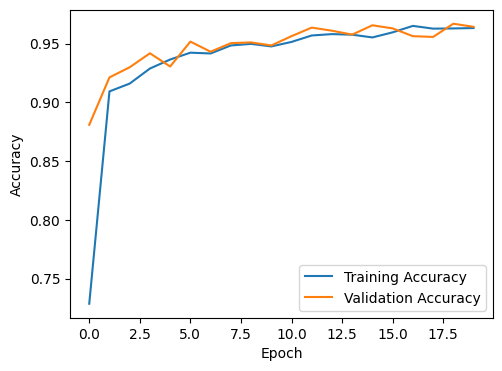

In [ ]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

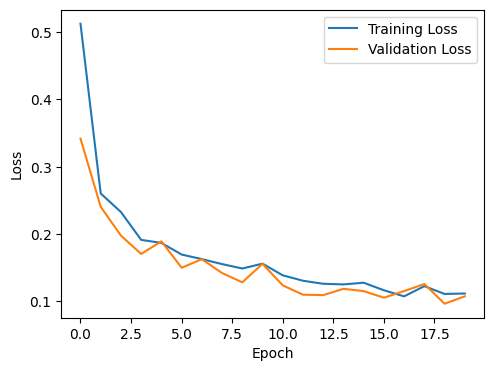

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(128, 128, 3),include_top=False, weights='imagenet')


9406464/9406464 [==============================] - 2s 0us/step


In [ ]:
base_model.trainable = False


In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
batch_size = 32
epochs = 20
history = model.fit(data_augmentation.flow(X_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    steps_per_epoch=len(X_train) // batch_size)


Epoch 1/20
188/188 [==============================] - 33s 147ms/step - loss: 0.1177 - accuracy: 0.9577 - val_loss: 0.0391 - val_accuracy: 0.9861
Epoch 2/20
188/188 [==============================] - 26s 137ms/step - loss: 0.0688 - accuracy: 0.9762 - val_loss: 0.0311 - val_accuracy: 0.9907
Epoch 3/20
188/188 [==============================] - 25s 132ms/step - loss: 0.0575 - accuracy: 0.9814 - val_loss: 0.0264 - val_accuracy: 0.9921
Epoch 4/20
188/188 [==============================] - 26s 137ms/step - loss: 0.0504 - accuracy: 0.9819 - val_loss: 0.0272 - val_accuracy: 0.9901
Epoch 5/20
188/188 [==============================] - 25s 135ms/step - loss: 0.0420 - accuracy: 0.9864 - val_loss: 0.0409 - val_accuracy: 0.9815
Epoch 6/20
188/188 [==============================] - 26s 136ms/step - loss: 0.0434 - accuracy: 0.9845 - val_loss: 0.0239 - val_accuracy: 0.9914
Epoch 7/20
188/188 [==============================] - 25s 134ms/step - loss: 0.0364 - accuracy: 0.9879 - val_loss: 0.0250 - val_ac

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
y_val_pred = np.argmax(model.predict(X_val), axis=-1)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# Calculate AUC
y_val_prob = model.predict(X_val)
y_val_pred = y_val_prob.argmax(axis=1)
auc = roc_auc_score(y_val, y_val_pred, multi_class='ovr')
print("AUC:", auc)


48/48 [==============================] - 1s 14ms/step
Validation Loss: 0.02417910471558571
Validation Accuracy: 0.9920582175254822

Confusion Matrix:
 [[757   4]
 [  8 742]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       761
           1       0.99      0.99      0.99       750

    accuracy                           0.99      1511
   macro avg       0.99      0.99      0.99      1511
weighted avg       0.99      0.99      0.99      1511

48/48 [==============================] - 1s 15ms/step
AUC: 0.9920385457731054


In [ ]:
model.save('model.h5')


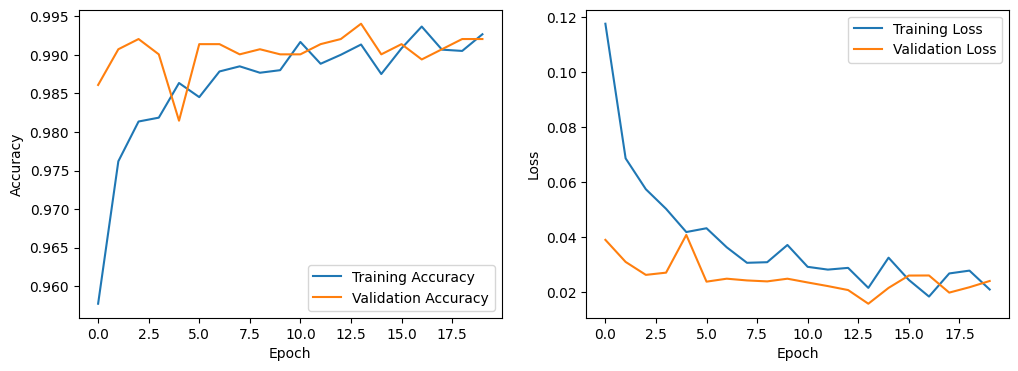

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
!unzip test1.zip


Archive:  test1.zip
   creating: test/
  inflating: test/1.jpg              
  inflating: test/10.jpg             
  inflating: test/11.jpg             
  inflating: test/12.jpg             
  inflating: test/2.jpg              
  inflating: test/3.jpg              
  inflating: test/4.jpg              
  inflating: test/5.jpg              
  inflating: test/6.jpg              
  inflating: test/7.jpg              
  inflating: test/8.jpg              
  inflating: test/9.jpg              
  inflating: test/without_mask_33.jpg  
  inflating: test/without_mask_34.jpg  
  inflating: test/without_mask_38.jpg  
  inflating: test/without_mask_39.jpg  
  inflating: test/with_mask_53.jpg   
  inflating: test/with_mask_54.jpg   
  inflating: test/with_mask_55.jpg   
  inflating: test/with_mask_58.jpg   
  inflating: test/with_mask_59.jpg   
  inflating: test/with_mask_60.jpg   


1/1 [==============================] - 1s 1s/step


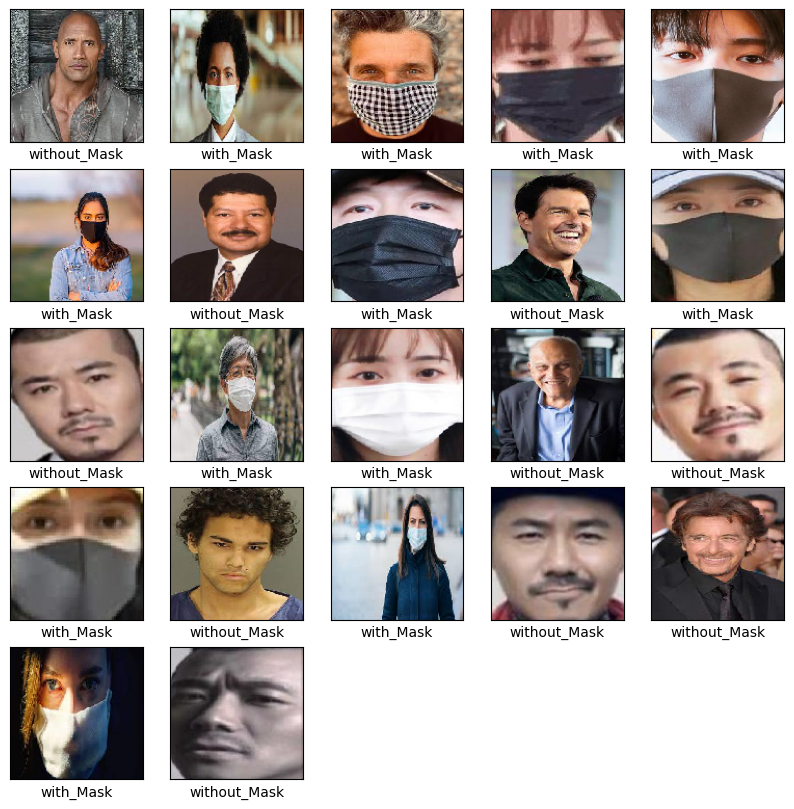

In [ ]:
# Load the model
model = models.load_model('model.h5')

# Load test images 
test_dir = '/content/test'
test_image_paths = [os.path.join(test_dir, image_name) for image_name in os.listdir(test_dir)]

# Make predictions on test images
test_images = []
for image_path in test_image_paths:
    img = image.load_img(image_path, target_size=(image_height, image_width))
    img_array = image.img_to_array(img)
    test_images.append(img_array)
test_images = np.array(test_images) / 255.0

predictions = model.predict(test_images)
prediction_labels = np.argmax(predictions, axis=-1)

# Plot the predictions 
plt.figure(figsize=(10, 10))
for i in range(len(test_images)):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    if prediction_labels[i] == 0:
        plt.xlabel('with_Mask')
    else:
        plt.xlabel('without_Mask')
plt.show()

In [ ]:
%%writefile app.py 

import streamlit as st
from tensorflow.keras.preprocessing import image
import numpy as np 
import os
import matplotlib.pyplot as plt
from tensorflow.keras import models
model = models.load_model('model.h5')
image_height, image_width = 128, 128

st.title('Face Mask Detection')

st.write('This app uses a CNN model to detect if a person is wearing a face mask or not.')
test_image = st.file_uploader('Choose an image...', type=['jpg', 'png'])

if test_image is not None: 
    test_image_path = test_image.name
    test_dir = '/tmp'
    os.makedirs(test_dir, exist_ok=True)
    test_image = test_image.getvalue() 
    with open(os.path.join(test_dir, test_image_path), "wb") as f: 
        f.write(test_image) 
   

    img = image.load_img(os.path.join(test_dir, test_image_path), target_size=(image_height, image_width))
    img_array = image.img_to_array(img)
    test_images = []
    test_images.append(img_array)
    test_images = np.array(test_images) / 255.0

    predictions = model.predict(test_images)
    prediction_labels = np.argmax(predictions, axis=-1)

    st.image(img)
    if prediction_labels[0] == 0:
        st.write('Prediction: The person is wearing a face mask.')
    else:
        st.write('Prediction: The person is not wearing a face mask.')

Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

npx: installed 22 in 3.154s


your url is: https://solid-mice-nail.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.82.23.106:8501

2023-05-22 09:54:46.962625: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 09:54:47.929686: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-22 09:54:49.078928: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-22 